### **Check Unbiasedness of A Given Type**

In [1]:
import numpy as np
import pandas as pd

# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
pd.set_option('expand_frame_repr', False)
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.width', 180)

In [11]:
L = []
L.extend([1,2,3,4])
L.extend([3,4,5,6])
L.append([1,2,3])
L

[1, 2, 3, 4, 3, 4, 5, 6, [1, 2, 3]]

In [6]:
[sum([[1,2,3], [3,4,5]], [])]

[[1, 2, 3, 3, 4, 5]]

In [6]:
# check unbiasedness
result = pd.read_csv("./result/2_unbias_check/temp_t2_iter100_policy1_K8.csv")
result

,index,type1_lam,type1_lam_new,type_1_mu,type_1_mu_new,number of cycles,time,num of packets,Cycle_len,CI,...,ratio_flow7.7,likelihood_7.7,variance_7.7,conditional_ratio7.7,ratio_flow8.7,likelihood_8.7,variance_8.7,conditional_ratio8.7,total_ratio.7,total_var.7
0,0,0.1,0.12115,1,0.804226,100000,82.825325,3237251,0.631075,"[0.6202,0.642]",...,0.13559,1.060298,2.963819,0.645390,0.00019,2.329459,5.022976,0.000904,0.21009,0.830512
1,1,0.1,0.12115,1,0.804226,100000,84.281641,3244723,0.627643,"[0.6165,0.6388]",...,0.13616,1.053089,2.787987,0.645614,0.00016,1.681009,1.612595,0.000759,0.21090,0.804935
2,2,0.1,0.12115,1,0.804226,100000,86.817436,3252907,0.628664,"[0.6173,0.6401]",...,0.13445,1.046539,2.716801,0.638141,0.00016,2.589615,2.096145,0.000759,0.21069,0.784789
3,3,0.1,0.12115,1,0.804226,100000,88.439801,3254957,0.621385,"[0.609,0.6338]",...,0.13571,1.072407,3.079774,0.645838,0.00016,1.930022,1.412136,0.000761,0.21013,0.853259
4,4,0.1,0.12115,1,0.804226,100000,86.055187,3211697,0.633456,"[0.6212,0.6458]",...,0.13464,1.075679,3.458398,0.642489,0.00009,3.417483,25.157518,0.000429,0.20956,0.935921
5,5,0.1,0.12115,1,0.804226,100000,90.277006,3263846,0.613810,"[0.6026,0.6251]",...,0.13667,1.053090,3.242567,0.648832,0.00014,3.609934,13.250881,0.000665,0.21064,0.847586


In [7]:
prob = pd.DataFrame()
CI = pd.DataFrame()
for i in range(27, 513, 64):
    prob['prob%s'%((i-27)//64)] = result.iloc[:,i]
    CI['CI_lower%s'%((i-27)//64)] = result.iloc[:,i+1].apply(lambda x : eval(x)[0])
    CI['CI_upper%s'%((i-27)//64)] = result.iloc[:,i+1].apply(lambda x : eval(x)[1])
prob

,prob0,prob1,prob2,prob3,prob4,prob5,prob6,prob7
0,0.000526,0.003403,0.012452,0.032566,0.072359,0.138982,0.241121,0.382748
1,0.000623,0.003510,0.012337,0.032570,0.072574,0.139173,0.242500,0.382323
2,0.000638,0.003317,0.012429,0.033092,0.071444,0.137703,0.239250,0.379467
3,0.000629,0.003528,0.012606,0.033420,0.072705,0.141151,0.241914,0.382859
4,0.000602,0.003614,0.012495,0.033387,0.071726,0.139041,0.239055,0.384946
5,0.000656,0.003463,0.012612,0.032761,0.072472,0.140547,0.238853,0.377590


In [8]:
prob.std()

prob0    0.000046
prob1    0.000104
prob2    0.000107
prob3    0.000389
prob4    0.000508
prob5    0.001234
prob6    0.001596
prob7    0.002655
dtype: float64

In [9]:
CI

,CI_lower0,CI_upper0,CI_lower1,CI_upper1,CI_lower2,CI_upper2,CI_lower3,CI_upper3,CI_lower4,CI_upper4,CI_lower5,CI_upper5,CI_lower6,CI_upper6,CI_lower7,CI_upper7
0,0.000460,0.000592,0.003193,0.003612,0.01194,0.01296,0.03156,0.03358,0.07050,0.07422,0.1353,0.1426,0.2347,0.2475,0.3714,0.3941
1,0.000549,0.000698,0.003287,0.003733,0.01183,0.01284,0.03153,0.03360,0.07071,0.07443,0.1355,0.1429,0.2360,0.2490,0.3711,0.3936
2,0.000558,0.000718,0.003110,0.003523,0.01193,0.01293,0.03205,0.03414,0.06961,0.07328,0.1341,0.1413,0.2329,0.2456,0.3683,0.3906
3,0.000556,0.000703,0.003308,0.003748,0.01209,0.01312,0.03237,0.03447,0.07085,0.07456,0.1374,0.1449,0.2355,0.2483,0.3714,0.3943
4,0.000531,0.000673,0.003388,0.003840,0.01199,0.01300,0.03232,0.03445,0.06988,0.07357,0.1354,0.1427,0.2327,0.2454,0.3731,0.3968
5,0.000573,0.000739,0.003250,0.003676,0.01212,0.01311,0.03174,0.03379,0.07062,0.07433,0.1368,0.1443,0.2325,0.2452,0.3662,0.3890


In [10]:
real = [0.000669478924356042435231952916781, 0.0036127871107343864840480020203595, 0.012649848515564681060522373800053, 0.033281871624842460508765292696539, 0.072418503692644969676263106873157, 0.13770964178876379356259140737605, 0.23679365581944631671850327533174, 0.37661889789252304101984230885306]


In [11]:
a = pd.DataFrame([prob.mean()])
a.loc[1, ] = np.array(real)
a.index = ['mean', 'real']
a

,prob0,prob1,prob2,prob3,prob4,prob5,prob6,prob7
mean,0.000613,0.003472,0.012488,0.032966,0.072214,0.139433,0.240449,0.381656
real,0.000669,0.003613,0.012650,0.033282,0.072419,0.137710,0.236794,0.376619


In [12]:
pd.DataFrame(CI.mean()).T

,CI_lower0,CI_upper0,CI_lower1,CI_upper1,CI_lower2,CI_upper2,CI_lower3,CI_upper3,CI_lower4,CI_upper4,CI_lower5,CI_upper5,CI_lower6,CI_upper6,CI_lower7,CI_upper7
0,0.000538,0.000687,0.003256,0.003689,0.011983,0.012993,0.031928,0.034005,0.070362,0.074065,0.13575,0.143117,0.23405,0.246833,0.37025,0.393067


In [13]:
cover = pd.DataFrame()
for i in range(8):
    cover['cover_%s'%i] = (CI['CI_lower%s'%i]<real[i]) & (CI['CI_upper%s'%i]>real[i])
cover

,cover_0,cover_1,cover_2,cover_3,cover_4,cover_5,cover_6,cover_7
0,False,False,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,False,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True


In [14]:
cover.mean()

cover_0    0.833333
cover_1    0.666667
cover_2    1.000000
cover_3    1.000000
cover_4    1.000000
cover_5    1.000000
cover_6    1.000000
cover_7    1.000000
dtype: float64

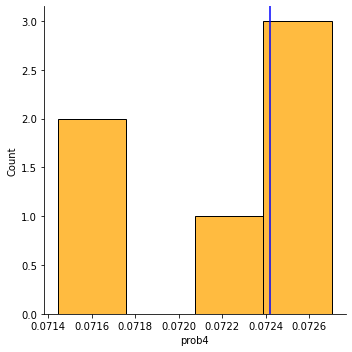

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(prob['prob4'], color='orange')
plt.axvline(real[4], color='b')